<a href="https://colab.research.google.com/github/gargidutta0602/EDA-Projects/blob/main/Adidas_Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adidas EDA and Sales Strategy
Analysis of sales data is essential to making strategic decisions in the dynamic retail market. This project's primary goal is to examine Adidas sales data in order to identify patterns, offer insightful commentary, and point out areas that might use improvement. Using Python and data analysis frameworks, the objective is to present a thorough study of Adidas' sales performance over a certain period of time.

# Data Description


1.   Retailer: The company or group that sells Adidas goods.
2.   Retailer ID: a unique number that each merchant is given
3.   Invoice Date: The date when the sales transaction occurred.
4.   Region: The store's operational geographic territory.
5.   State: The state within the region where the retailer is located.
6.   City: The retailer's location in the city.
7.   Product: The item for sale is an Adidas product.
8.   Price per Unit: The price of a single Adidas product unit.
9.   Units Sold: The amount of Adidas merchandise sold in a certain transaction, expressed in units.
10.  Total Sales: The amount of money made from the sale of Adidas goods in a certain transaction.
11.  Operating Profit: The amount of money made from the sale of Adidas goods in a certain transaction.
12.  Operating Margin: The proportion of operational profit to overall sales.
13.  Sales Method: The process used to carry out the sales transaction.






In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
!unzip "/content/archive (12).zip"

Archive:  /content/archive (12).zip
  inflating: Adidas US Sales Datasets.xlsx  


In [4]:
data = pd.read_excel("/content/Adidas US Sales Datasets.xlsx")

In [5]:
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


**Data cleaning **

In [6]:
data.drop("Unnamed: 0", axis=1, inplace = True)

In [7]:
data.drop(data.index[0:3],inplace=True)

In [8]:
data.columns = data.iloc[0]

In [9]:
data.drop(data.index[0], inplace = True)

In [ ]:
data.reset_index(drop = True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 4 to 9651
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   object        
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   object        
 8   Units Sold        9648 non-null   object        
 9   Total Sales       9648 non-null   object        
 10  Operating Profit  9648 non-null   object        
 11  Operating Margin  9648 non-null   object        
 12  Sales Method      9648 non-null   object        
 13  state_City        9648 non-null   object        
dtypes: datetime64[ns](1), ob

In [30]:
data["Invoice Date"] = pd.to_datetime(data["Invoice Date"], format = "%Y-%m-%d")

In [11]:
data.isna().sum() # checking duplicate value

3
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [12]:
data.duplicated().sum() #Checking whether the dataset have duplicated values

0

# EDA

# Total Sales by each retailer

In [13]:
sales_sum = pd.DataFrame(data.groupby('Retailer')['Total Sales'].sum())
#sales_sum
sales_sum.sort_values(ascending=False,by='Total Sales')

,Total Sales
Retailer,
West Gear,242964333.0
Foot Locker,220094720.0
Sports Direct,182470997.0
Kohl's,102114753.0
Amazon,77698912.0
Walmart,74558410.0


# Top Selleing product

In [14]:
top_product = data.groupby('Product').agg({'Units Sold':"sum"}).sort_values(by ='Units Sold',ascending = False).reset_index()
top_product

3,Product,Units Sold
0,Men's Street Footwear,593320
1,Men's Athletic Footwear,435526
2,Women's Apparel,433827
3,Women's Street Footwear,392269
4,Women's Athletic Footwear,317236
5,Men's Apparel,306683


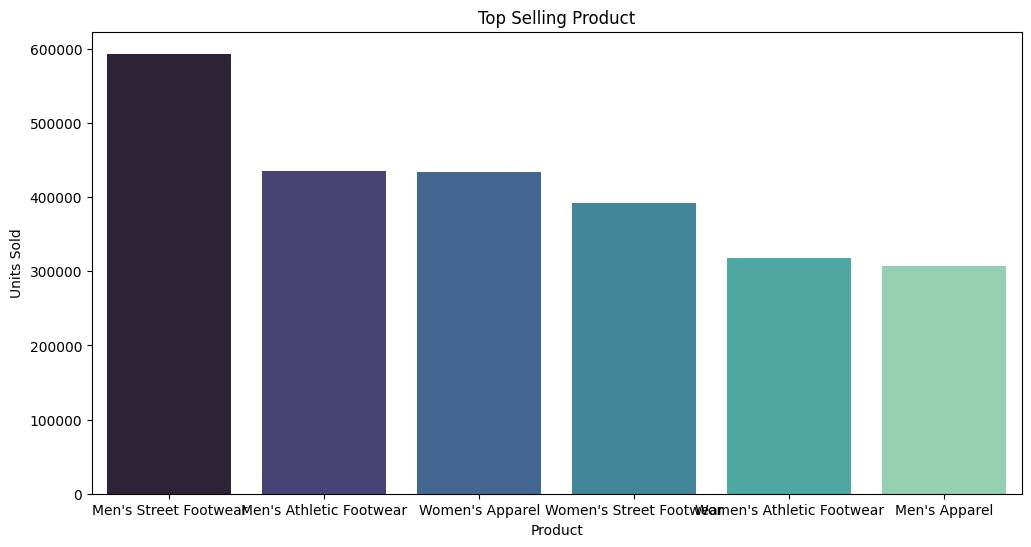

In [15]:
plt.figure(figsize =(12,6))
sns.barplot(x = 'Product', y = 'Units Sold', data = top_product,palette='mako',hue ='Product' )
plt.title ("Top Selling Product")
plt.xlabel("Product")
plt.ylabel("Units Sold")
plt.show()

## Total Sales by Region

In [16]:
top_region = data.groupby(by="Region").agg({'Total Sales':"sum"}).sort_values(by ='Total Sales',ascending = False).reset_index()
top_region

3,Region,Total Sales
0,West,269943182.0
1,Northeast,186324067.0
2,Southeast,163171236.0
3,South,144663181.0
4,Midwest,135800459.0


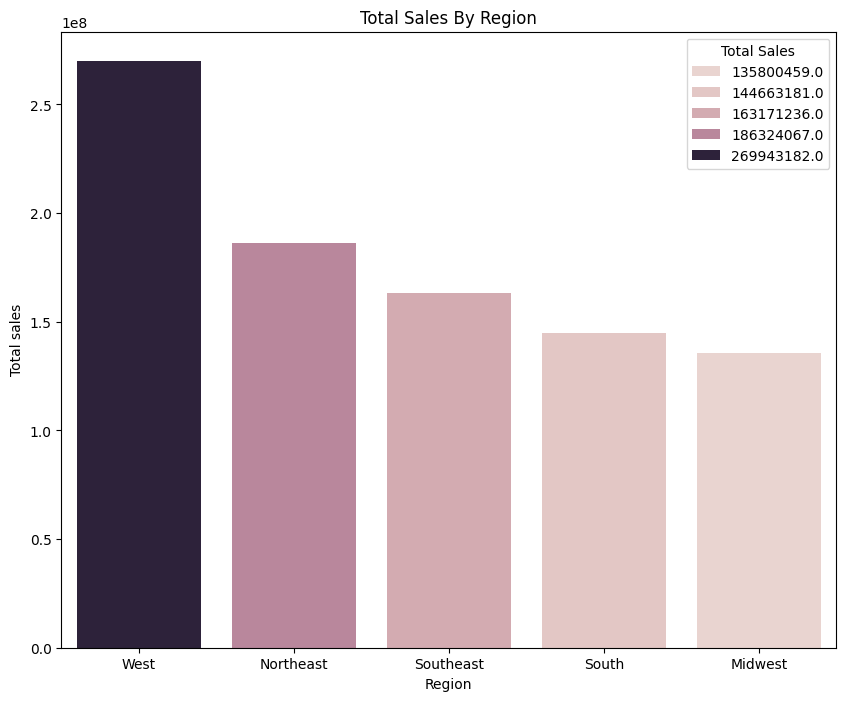

In [17]:
plt.figure(figsize=(10,8))
sns.barplot(x = "Region", y = 'Total Sales', hue = "Total Sales",data = top_region)
plt.title ("Total Sales By Region")
plt.xlabel("Region")
plt.ylabel("Total sales")
plt.show()

## Product Sales at Retailer

In [18]:
product_sales_at_retailer = data.groupby(by = ["Product","Retailer"])['Total Sales'].sum().reset_index()
product_sales_at_retailer.set_index(keys=["Product","Retailer"])

Total Sales
Product                   Retailer                 
Men's Apparel             Amazon         10474770.0
                          Foot Locker    29508995.0
                          Kohl's         14164965.0
                          Sports Direct  24825286.0
                          Walmart        11490680.0
                          West Gear      33263936.0
Men's Athletic Footwear   Amazon         12011959.0
                          Foot Locker    36480415.0
                          Kohl's         17885316.0
                          Sports Direct  30889734.0
                          Walmart        13600404.0
                          West Gear      42805852.0
Men's Street Footwear     Amazon         22161652.0
                          Foot Locker    57481575.0
                          Kohl's         22421073.0
                          Sports Direct  38672270.0
                          Walmart        14924255.0
                          West Gear      53165419.0
Women's Apparel           Amazon         15710639.0
                          Foot Locker    43296114.0
                          Kohl's         20315239.0
                          Sports Direct  37113257.0
                          Walmart        15316099.0
                          West Gear      47287512.0
Women's Athletic Footwear Amazon          7935255.0
                          Foot Locker    24239624.0
                          Kohl's         12493869.0
                          Sports Direct  23145288.0
                          Walmart         8762792.0
                          West Gear      30055068.0
Women's Street Footwear   Amazon          9404637.0
                          Foot Locker    29087997.0
                          Kohl's         14834291.0
                          Sports Direct  27825162.0
                          Walmart        10464180.0
                          West Gear      36386546.0

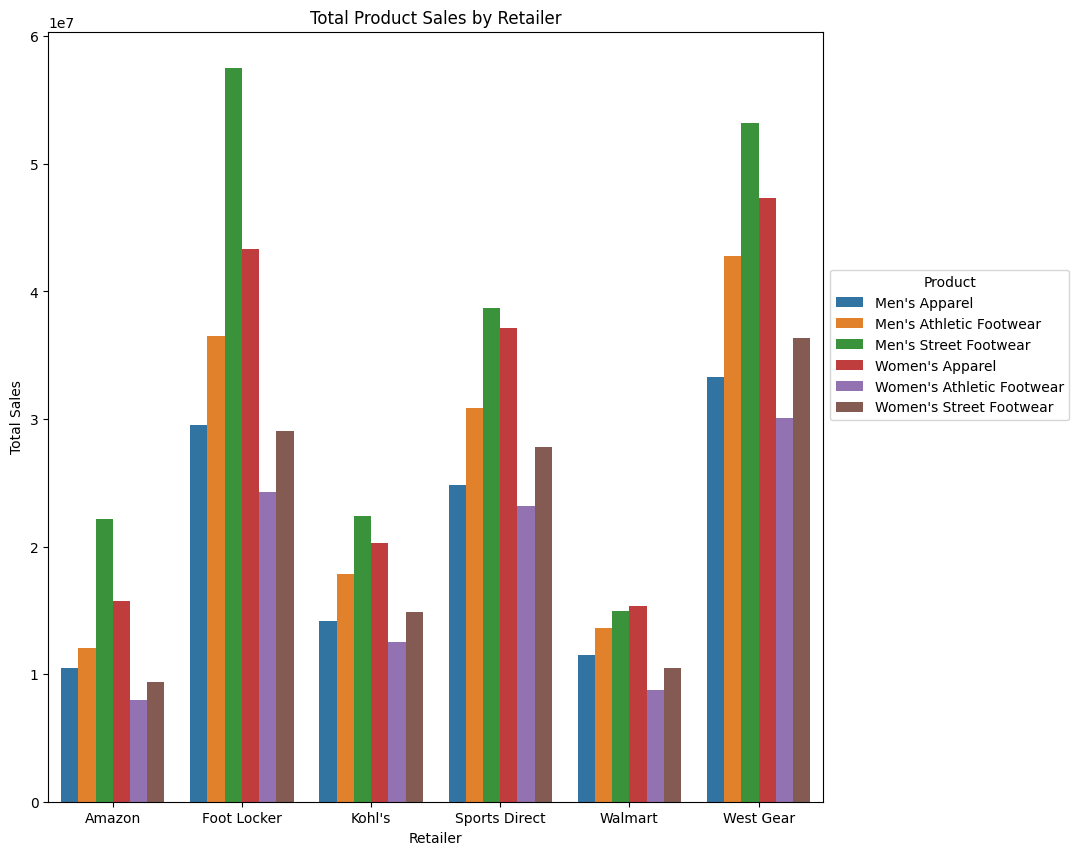

In [19]:
plt.figure(figsize = (10,10))
sns.barplot(x = 'Retailer', y = "Total Sales", hue = 'Product', data = product_sales_at_retailer )
plt. title ("Total Product Sales by Retailer")
plt.xlabel("Retailer")
plt.ylabel("Total Sales")
plt.legend(title = 'Product',bbox_to_anchor=(1,0.7))
plt.show()

Least and most sales - State and City wise


In [25]:
State_City_Sales = data.groupby(by = ["State","City"] )["Total Sales"].sum().reset_index()
State_City_Sales.set_index(keys = ['State','City'])

Total Sales
State          City                      
Alabama        Birmingham      17633424.0
Alaska         Anchorage       14753103.0
Arizona        Phoenix         15782221.0
Arkansas       Little Rock     12639347.0
California     Los Angeles     25634913.0
               San Francisco   34539220.0
Colorado       Denver          20996536.0
Connecticut    Hartford        11573448.0
Delaware       Wilmington      12298412.0
Florida        Miami           31600863.0
               Orlando         27682851.0
Georgia        Atlanta         18997466.0
Hawaii         Honolulu        22282457.0
Idaho          Boise           19276878.0
Illinois       Chicago          9797488.0
Indiana        Indianapolis     8836198.0
Iowa           Des Moines       7424011.0
Kansas         Wichita          9972864.0
Kentucky       Louisville      10072848.0
Louisiana      New Orleans     23750781.0
Maine          Portland         9195978.0
Maryland       Baltimore        7758059.0
Massachusetts  Boston          11076810.0
Michigan       Detroit         18625433.0
Minnesota      Minneapolis      7378068.0
Mississippi    Jackson         15591709.0
Missouri       St. Louis        9683265.0
Montana        Billings        15710886.0
Nebraska       Omaha            5929038.0
Nevada         Las Vegas       20858509.0
New Hampshire  Manchester      16411667.0
New Jersey     Newark           9934246.0
New Mexico     Albuquerque     19865016.0
New York       Albany          24427804.0
               New York        39801235.0
North Carolina Charlotte       23956531.0
North Dakota   Fargo            7735580.0
Ohio           Columbus        18484583.0
Oklahoma       Oklahoma City   10620734.0
Oregon         Portland        21349674.0
Pennsylvania   Philadelphia    10357519.0
Rhode Island   Providence       8446806.0
South Carolina Charleston      29285637.0
South Dakota   Sioux Falls      8495576.0
Tennessee      Knoxville       18067440.0
Texas          Dallas          20902864.0
               Houston         25456882.0
Utah           Salt Lake City   9696420.0
Vermont        Burlington      14352923.0
Virginia       Richmond        21575040.0
Washington     Seattle         26330718.0
West Virginia  Charleston      10689160.0
Wisconsin      Milwaukee        7727469.0
Wyoming        Cheyenne        18577517.0

In [26]:
data["state_City"] = data["State"]+" "+ data["City"]

In [45]:
data.head()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,state_City,Year,Month,Date
4,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store,New York New York,2020,1,1
5,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store,New York New York,2020,1,2
6,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store,New York New York,2020,1,3
7,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store,New York New York,2020,1,4
8,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store,New York New York,2020,1,5


In [46]:
data['Year'].value_counts()

2021    8346
2020    1302
Name: Year, dtype: int64

Month-**Wise** Sales Over Years

In [33]:
data['Year'] = data['Invoice Date'].dt.year
data['Month'] = data['Invoice Date'].dt.month
data['Date'] = data['Invoice Date'].dt.day

In [ ]:
Yearly_Sales = data.groupby(by = ["Year", "Month"])["Total Sales"].sum().reset_index()
Yearly_Sales

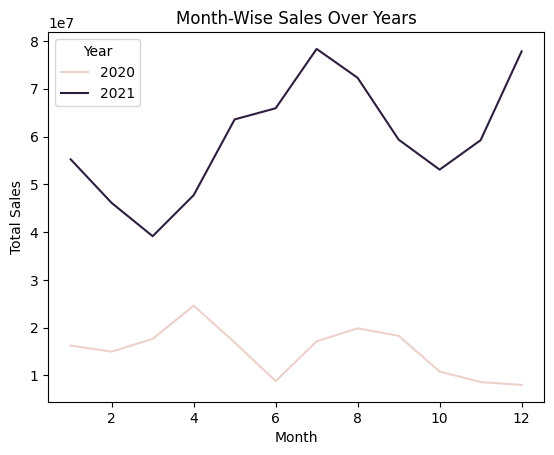

In [59]:
sns.lineplot(x = "Month", y = "Total Sales", data = Yearly_Sales,hue = "Year")
plt.title('Month-Wise Sales Over Years')
plt.show()